In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [33]:
tickers = [
    # BFSI
    "HDFCBANK.NS",      # HDFC Bank
    "SBIN.NS",          # State Bank of India
    "AXISBANK.NS",      # Axis Bank
    "ICICIGI.NS",  # ICICI Lombard General Insurance
    "SHRIRAMFIN.NS",    # Shriram Finance

    # Consumers
    "ITC.NS",           # ITC
    "TATACONSUM.NS",    # Tata Consumer Products
    "VMART.NS",         # V-Mart
    "CROMPTON.NS",      # Crompton Consumer

    # Auto
    "M&M.NS",           # Mahindra & Mahindra
    "MARUTI.NS",        # Maruti Suzuki

    # IT
    "HCLTECH.NS",       # HCL Technologies
    "TCS.NS",           # Tata Consultancy Services

    # Healthcare
    "APOLLOHOSP.NS",    # Apollo Hospitals Enterprise
    "SYNGENE.NS",       # Syngene International
    "AUROPHARMA.NS",    # Aurobindo Pharma

    # Leisure
    "INDHOTEL.NS",          # Indian Hotels Company (Taj Hotels)
    "LEMONTREE.NS",     # Lemon Tree Hotels
    "INDIGO.NS",        # InterGlobe Aviation (IndiGo)

    # Energy
    "RELIANCE.NS",      # Reliance Industries

    # Materials
    "ULTRACEMCO.NS",    # UltraTech Cement

    # Industrials
    "ABB.NS",           # ABB India
    "TIINDIA.NS",    # Tube Investments of India
    "POLYCAB.NS"        # Polycab India
]


In [34]:
weights = [
    0.07, 0.06, 0.04, 0.04, 0.04,  # BFSI: HDFCBANK, SBIN, AXISBANK, ICICILOMBARD, SHRIRAMFIN
    0.05, 0.05, 0.04, 0.04,        # Consumers: ITC, TATACONSUM, VMART, CROMPTON
    0.04, 0.04,                    # Auto: M&M, MARUTI
    0.03, 0.03,                    # IT: HCLTECH, TCS
    0.04, 0.04, 0.04,              # Healthcare: APOLLOHOSP, SYNGENE, AUROPHARMA
    0.04, 0.04, 0.04,              # Leisure: IHCL, LEMONTREE, INDIGO
    0.06,                          # Energy: RELIANCE
    0.04,                          # Materials: ULTRACEMCO
    0.03, 0.03, 0.03               # Industrials: ABB, TUBEINVEST, POLYCAB
]

In [35]:
#download historical data for given period of each stock
start_date= input("Enter the start date")#'2020-01-01'
end_date= input("Enter the end date")#'2024-12-31'
data= yf.download(tickers, start=start_date, end=end_date)['Close'].dropna()

/var/folders/zb/ht4y7_4j4_96z30rdgrpv_dm0000gn/T/ipykernel_58850/2258705853.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download(tickers, start=start_date, end=end_date)['Close'].dropna()
[*********************100%***********************]  24 of 24 completed


In [36]:
# Calculate daily returns for each stock
daily_returns = data.pct_change().dropna()

# Calculate portfolio returns using the weights
portfolio_returns = daily_returns.dot(weights)

# Calculate cumulative return of the portfolio over the time period
cumulative_return = (portfolio_returns + 1).prod() - 1
print(f"Overall portfolio return from {start_date} to {end_date}: {cumulative_return:.2%}")
# Extract year from start_date and end_date strings
start_year = int(start_date[:4])
end_year = int(end_date[:4])

print(f"CAGR of the portfolio: {((1 + cumulative_return) ** (1 / (end_year - start_year)) - 1):.2%}")

Overall portfolio return from 2020-01-01 to 2025-06-15: 254.48%
CAGR of the portfolio: 28.80%


Markowitz (Max Sharpe) optimal weights:
HDFCBANK.NS: 0.1085
SBIN.NS: 0.1347
AXISBANK.NS: 0.0200
ICICIGI.NS: 0.0200
SHRIRAMFIN.NS: 0.0200
ITC.NS: 0.0904
TATACONSUM.NS: 0.0200
VMART.NS: 0.0200
CROMPTON.NS: 0.0200
M&M.NS: 0.0297
MARUTI.NS: 0.0200
HCLTECH.NS: 0.0200
TCS.NS: 0.0799
APOLLOHOSP.NS: 0.0200
SYNGENE.NS: 0.0905
AUROPHARMA.NS: 0.0200
INDHOTEL.NS: 0.0200
LEMONTREE.NS: 0.0200
INDIGO.NS: 0.0200
RELIANCE.NS: 0.0200
ULTRACEMCO.NS: 0.0200
ABB.NS: 0.1263
TIINDIA.NS: 0.0200
POLYCAB.NS: 0.0200

Risk Parity optimal weights:
HDFCBANK.NS: 0.0417
SBIN.NS: 0.0417
AXISBANK.NS: 0.0417
ICICIGI.NS: 0.0417
SHRIRAMFIN.NS: 0.0417
ITC.NS: 0.0417
TATACONSUM.NS: 0.0417
VMART.NS: 0.0417
CROMPTON.NS: 0.0417
M&M.NS: 0.0417
MARUTI.NS: 0.0417
HCLTECH.NS: 0.0417
TCS.NS: 0.0417
APOLLOHOSP.NS: 0.0417
SYNGENE.NS: 0.0417
AUROPHARMA.NS: 0.0417
INDHOTEL.NS: 0.0417
LEMONTREE.NS: 0.0417
INDIGO.NS: 0.0417
RELIANCE.NS: 0.0417
ULTRACEMCO.NS: 0.0417
ABB.NS: 0.0417
TIINDIA.NS: 0.0417
POLYCAB.NS: 0.0417

Markowitz Portfolio

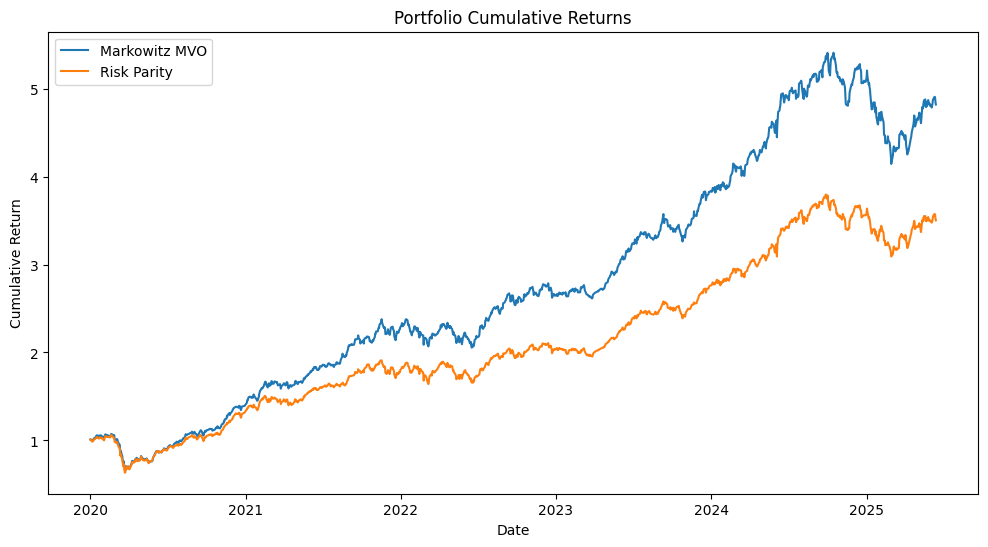

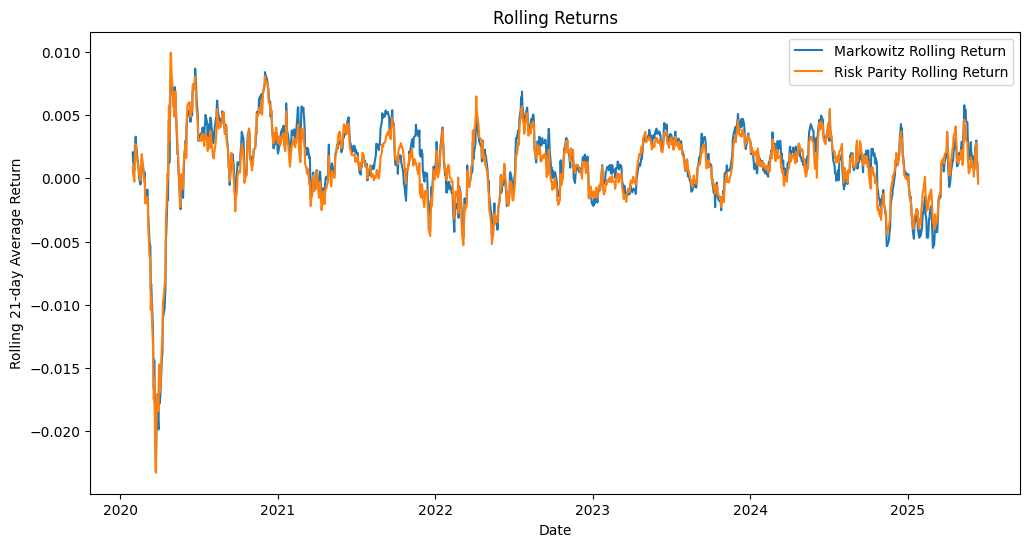

In [ ]:
# Step 1: Compute statistics from daily returns for use in optimization
from scipy.optimize import minimize

mean_returns = daily_returns.mean()  # daily mean return per asset
cov_matrix = daily_returns.cov()

# -------------------------------------------
# Step 2: MARKOWITZ MEAN-VARIANCE OPTIMIZATION (Maximizing Sharpe Ratio)
# Define objective to maximize Sharpe (or equivalently minimize negative Sharpe).
def neg_sharpe(weights, mean_returns, cov_matrix):
    port_return = np.dot(weights, mean_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # risk-free rate assumed to be zero; adjust if needed
    return -(port_return / port_std)

# Constraints: weights sum to one and each weight between 2% and 1 (no shorting)
cons = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
bounds = [(0.02, 1.0)] * len(tickers)
# Initial guess (uniform)
init_guess = np.repeat(1/len(tickers), len(tickers))

res_mvo = minimize(neg_sharpe, init_guess, args=(mean_returns, cov_matrix),
                   method='SLSQP', bounds=bounds, constraints=cons)
markowitz_weights = res_mvo.x

print("Markowitz (Max Sharpe) optimal weights:")
for ticker, weight in zip(tickers, markowitz_weights):
    print(f"{ticker}: {weight:.4f}")

# Use these weights to compute portfolio performance
portfolio_returns_mvo = daily_returns.dot(markowitz_weights)
portfolio_cum_returns_mvo = (1 + portfolio_returns_mvo).cumprod()

# -------------------------------------------
# Step 3: RISK PARITY OPTIMIZATION
# We define risk contributions of each asset
def risk_contribution(weights, cov_matrix):
    port_variance = np.dot(weights, np.dot(cov_matrix, weights))
    # marginal contribution to risk: dVar/dw = 2 * cov_matrix @ weights (factor 2 cancels later)
    marginal_contrib = np.dot(cov_matrix, weights)
    return weights * marginal_contrib

# Objective: minimize the squared deviations among risk contributions
def risk_parity_objective(weights, cov_matrix):
    RC = risk_contribution(weights, cov_matrix)
    port_variance = np.dot(weights, np.dot(cov_matrix, weights))
    target_RC = port_variance / len(weights)
    return np.sum((RC - target_RC)**2)

res_rp = minimize(risk_parity_objective, init_guess, args=(cov_matrix,),
                  method='SLSQP', bounds=bounds, constraints=cons)
risk_parity_weights = res_rp.x

print("\nRisk Parity optimal weights:")
for ticker, weight in zip(tickers, risk_parity_weights):
    print(f"{ticker}: {weight:.4f}")

portfolio_returns_rp = daily_returns.dot(risk_parity_weights)
portfolio_cum_returns_rp = (1 + portfolio_returns_rp).cumprod()

# -------------------------------------------
# Step 4: PERFORMANCE METRICS FUNCTIONS
def calculate_sharpe(port_returns, risk_free_rate=0):
    # Assuming daily returns, annualize factor = sqrt(252)
    excess = port_returns - risk_free_rate/252
    sharpe = np.mean(excess) / np.std(excess)
    return sharpe * np.sqrt(252)

def max_drawdown(cumulative_returns):
    roll_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / roll_max - 1
    return drawdown.min()

# Calculate for Markowitz portfolio
sharpe_mvo = calculate_sharpe(portfolio_returns_mvo)
mdd_mvo = max_drawdown(portfolio_cum_returns_mvo)
print(f"\nMarkowitz Portfolio Annualized Sharpe Ratio: {sharpe_mvo:.2f}")
print(f"Markowitz Portfolio Maximum Drawdown: {mdd_mvo:.2%}")
print(f"Markowitz Portfolio Cumulative Return: {portfolio_cum_returns_mvo.iloc[-1]:.2%}")
print(f"Markowitz Portfolio CAGR: {((1 + portfolio_cum_returns_mvo.iloc[-1]) ** (1 / (end_year - start_year)) - 1):.2%}")
print(f"Markowitz Portfolio Annualized Volatility: {portfolio_returns_mvo.std() * np.sqrt(252):.2%}")


# Calculate for Risk Parity portfolio
sharpe_rp = calculate_sharpe(portfolio_returns_rp)
mdd_rp = max_drawdown(portfolio_cum_returns_rp)
print(f"\nRisk Parity Portfolio Annualized Sharpe Ratio: {sharpe_rp:.2f}")
print(f"Risk Parity Portfolio Maximum Drawdown: {mdd_rp:.2%}")

# -------------------------------------------
# Step 5: Rolling Returns Example (e.g., 21-day rolling average)
rolling_window = 21  # about 1 month of trading days
rolling_returns_mvo = portfolio_returns_mvo.rolling(window=rolling_window).mean()
rolling_returns_rp = portfolio_returns_rp.rolling(window=rolling_window).mean()

# Optionally, plot the cumulative returns and rolling returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cum_returns_mvo, label='Markowitz MVO')
plt.plot(portfolio_cum_returns_rp, label='Risk Parity')
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Portfolio Cumulative Returns")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(rolling_returns_mvo, label='Markowitz Rolling Return')
plt.plot(rolling_returns_rp, label='Risk Parity Rolling Return')
plt.xlabel("Date")
plt.ylabel("Rolling 21-day Average Return")
plt.title("Rolling Returns")
plt.legend()
plt.show()